In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from skimage.color import rgb2gray
import pickle
import math
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import gc
import cv2
from tensorflow.keras import layers, models

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/ADL/Project/Dataset'

In [ ]:
with open(os.path.join(path, 'train_dataset_level4_64.pkl'), 'rb') as f:
    train_slides, train_labels = pickle.load(f)

In [ ]:
X = [cv2.resize(x, dsize=(75, 75), interpolation=cv2.INTER_CUBIC) for x in train_slides]

In [ ]:
X = np.array(X)/255
y = np.array(train_labels)

In [ ]:
del train_slides, train_labels
gc.collect()

670

In [ ]:
with open(os.path.join(path, 'test_dataset_level4_64.pkl'), 'rb') as f:
    test_slides, y_test = pickle.load(f)

In [ ]:
X_test = [cv2.resize(x, dsize=(75, 75), interpolation=cv2.INTER_CUBIC) for x in test_slides]
X_test = np.array(X_test)/255

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

In [ ]:
val_ds = tf.data.Dataset.from_tensor_slices((X_val, y_val))

In [ ]:
num_training_samples = len(train_ds)

In [ ]:
def configure_dataset(dataset):
  return dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

train_ds = configure_dataset(train_ds)
# val_ds = configure_dataset(val_ds)

In [ ]:
train_ds = train_ds.repeat().shuffle(num_training_samples)

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=[75, 75, 3], include_top=False)

In [ ]:
base_model.trainable = False 

global_average_layer = layers.GlobalAveragePooling2D()
prediction_layer = layers.Dense(1, activation='sigmoid')

model = models.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 1, 1, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2049      
Total params: 21,804,833
Trainable params: 2,049
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# history = model.fit(train_ds, validation_data=val_ds, steps_per_epoch=math.ceil(num_training_samples/256))
history = model.fit(X, y, validation_split=0.2, epochs=10)

Epoch 1/10
985/985 [==============================] - 62s 26ms/step - loss: 0.2229 - accuracy: 0.9301 - val_loss: 0.1604 - val_accuracy: 0.9582
Epoch 2/10
985/985 [==============================] - 22s 23ms/step - loss: 0.1775 - accuracy: 0.9400 - val_loss: 0.1610 - val_accuracy: 0.9550
Epoch 3/10
985/985 [==============================] - 22s 22ms/step - loss: 0.1663 - accuracy: 0.9441 - val_loss: 0.1580 - val_accuracy: 0.9577
Epoch 4/10
985/985 [==============================] - 22s 22ms/step - loss: 0.1660 - accuracy: 0.9429 - val_loss: 0.1513 - val_accuracy: 0.9615
Epoch 5/10
985/985 [==============================] - 22s 22ms/step - loss: 0.1616 - accuracy: 0.9435 - val_loss: 0.1522 - val_accuracy: 0.9618
Epoch 6/10
985/985 [==============================] - 22s 22ms/step - loss: 0.1624 - accuracy: 0.9444 - val_loss: 0.1603 - val_accuracy: 0.9552
Epoch 7/10
985/985 [==============================] - 22s 22ms/step - loss: 0.1605 - accuracy: 0.9439 - val_loss: 0.1691 - val_accuracy:

In [ ]:
model.save('model.h5')

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

NameError: ignored

In [ ]:
new_model = models.load_model('model.h5')

In [ ]:
y_pred = new_model.predict(X_test)

In [ ]:
len(y_pred)

15960

In [ ]:
temp = y_pred[(136*70):]

In [ ]:
len(temp)

6440

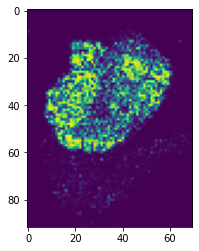

In [ ]:
plt.imshow(np.reshape(temp, (92,70)))